In [51]:
import pandas as pd 
import matplotlib.pyplot as plt 



In [52]:
# read the csv file 
data = pd.read_csv('customer_booking.csv', encoding='latin1')
data.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [53]:
# DATA QUALITY CHECKS 
# TODO: DO A VISUALISATION TOO 
missing_values = data.isnull().sum() 
print("Missing Values: /n", missing_values)

Missing Values: /n num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [54]:
# Group by the specified columns and count the records
grouped_df = data.groupby([
    'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay',
    'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
    'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete'
]).size().reset_index(name='record_count')

# Filter the groups having record_count > 1
filtered_df = grouped_df[grouped_df['record_count'] > 1]

# Sort the result by record_count in descending order
sorted_df = filtered_df.sort_values(by='record_count', ascending=False)
sorted_df = pd.DataFrame(sorted_df)
sorted_df.head() 


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,record_count
46183,3,Mobile,RoundTrip,37,18,4,Tue,HNDTRZ,Japan,1,0,0,7.57,0,11
30599,1,Mobile,RoundTrip,199,6,18,Mon,IKASZX,China,0,0,0,8.15,0,9
42588,2,Mobile,RoundTrip,29,6,6,Thu,DPSPVG,China,1,1,1,5.33,0,8
30142,1,Mobile,RoundTrip,98,36,13,Mon,DMKSYD,Australia,1,1,1,8.58,0,8
46281,3,Mobile,RoundTrip,93,5,0,Sun,DPSPVG,(not set),0,0,1,5.33,0,7


In [55]:
# Aggregating data by computing min, max, and average
aggregations = {
    'num_passengers': ['min', 'max', 'mean'],
    'purchase_lead': ['min', 'max', 'mean'],
    'length_of_stay': ['min', 'max', 'mean'],
    'flight_duration': ['min', 'max', 'mean']
}

# Apply aggregation
result = data.agg(aggregations)

# Flatten the multi-index in columns
result.columns = [''.join(col).strip() for col in result.columns.values]

# Rename columns to match your SQL output naming convention
result.rename(columns={
    'num_passengers_min': 'min_num_passengers',
    'num_passengers_max': 'max_num_passengers',
    'num_passengers_mean': 'avg_num_passengers',
    'purchase_lead_min': 'min_purchase_lead',
    'purchase_lead_max': 'max_purchase_lead',
    'purchase_lead_mean': 'avg_purchase_lead',
    'length_of_stay_min': 'min_length_of_stay',
    'length_of_stay_max': 'max_length_of_stay',
    'length_of_stay_mean': 'avg_length_of_stay',
    'flight_duration_min': 'min_flight_duration',
    'flight_duration_max': 'max_flight_duration',
    'flight_duration_mean': 'avg_flight_duration'
}, inplace=True)

result = pd.DataFrame(result)
result.head() 


,num_passengers,purchase_lead,length_of_stay,flight_duration
min,1.00000,0.00000,0.00000,4.670000
max,9.00000,867.00000,778.00000,9.500000
mean,1.59124,84.94048,23.04456,7.277561


In [56]:
# Check for duplicates 
# TODO: VISUALISE THE DUPLICATED ROWS OR USE PANDAS 
duplicates = data.duplicated().sum() 
print("Number of Duplicate Rows: ", duplicates)

Number of Duplicate Rows:  719


In [57]:
# SUMMARY STATISTICS 
# TODO: CONVERT THIS TO PANDAS 
summary_stats = data.describe() 
summary_stats = pd.DataFrame(summary_stats)
summary_stats.head() 


# print("Summary Statistics: \n", summary_stats)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000


In [58]:
# DATA TYPE CHECKS 
data_types = data.dtypes 

print("Data Types: \n", data_types)

Data Types: 
 num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


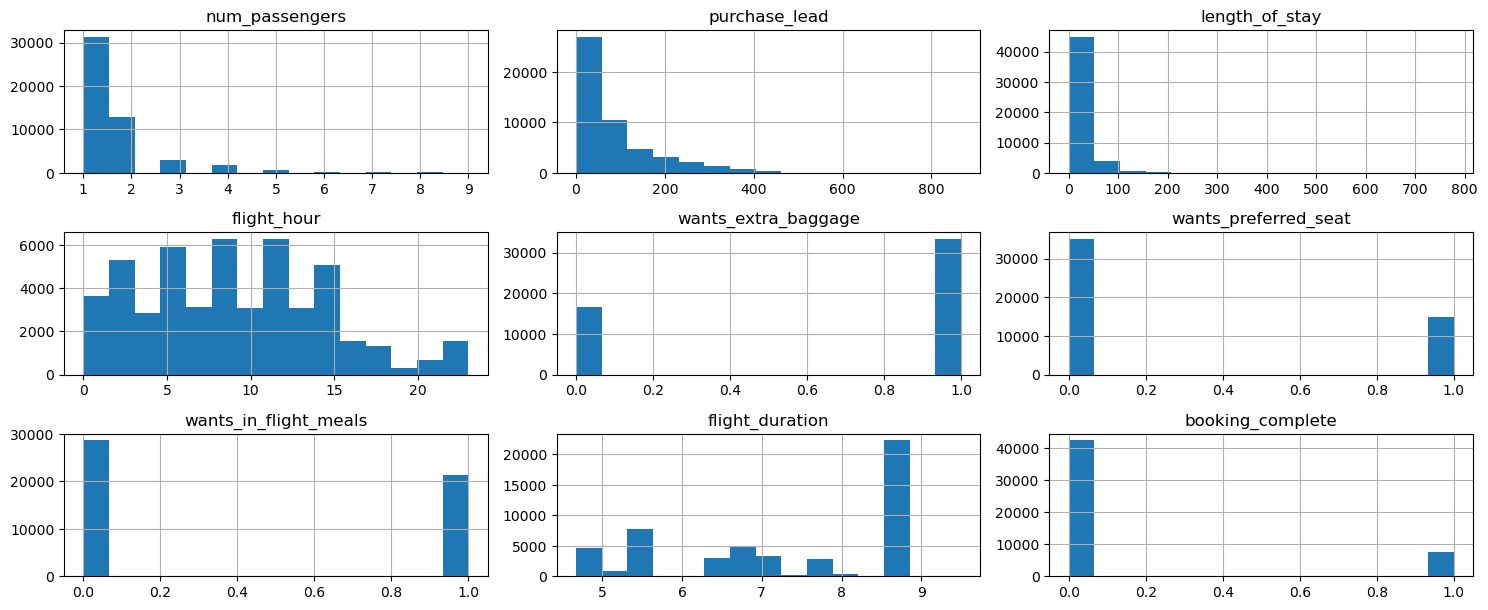

In [31]:

# DISTRIBUTION OF NUMERICAL VARIABLES 
# Visualize distribution of numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()



In [60]:
# DESCRIPTIVE ANALYTICS 

In [61]:
# FLIGHT BOOKING TRENDS 

# Group by 'flight_day' and count the number of bookings
flight_day_bookings = data.groupby('flight_day').size().reset_index(name='num_bookings')

# Display the grouped data
flight_day_bookings = pd.DataFrame(flight_day_bookings)
flight_day_bookings.head() 

# # Sort by 'flight_day' if necessary (assuming flight_day is a string, for example, day of the week)
# flight_day_bookings = flight_day_bookings.sort_values(by='flight_day')

# # Plot the booking trends by flight day
# plt.figure(figsize=(12, 6))
# plt.plot(flight_day_bookings['flight_day'], flight_day_bookings['num_bookings'], marker='o', linestyle='-')
# plt.title('Number of Bookings by Flight Day')
# plt.xlabel('Flight Day')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

,flight_day,num_bookings
0,Fri,6761
1,Mon,8102
2,Sat,5812
3,Sun,6554
4,Thu,7424


In [63]:
# 2. SALES CHANNEL PERFORMANCE 

# Group by 'sales_channel' and calculate the number of bookings and completed bookings
sales_channel_bookings = data.groupby('sales_channel').agg(
    num_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Sort the results by number of bookings in descending order
sales_channel_bookings = sales_channel_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
sales_channel_bookings = pd.DataFrame(sales_channel_bookings)
sales_channel_bookings.head() 


,sales_channel,num_bookings,completed_bookings
0,Internet,44382,6869
1,Mobile,5618,609


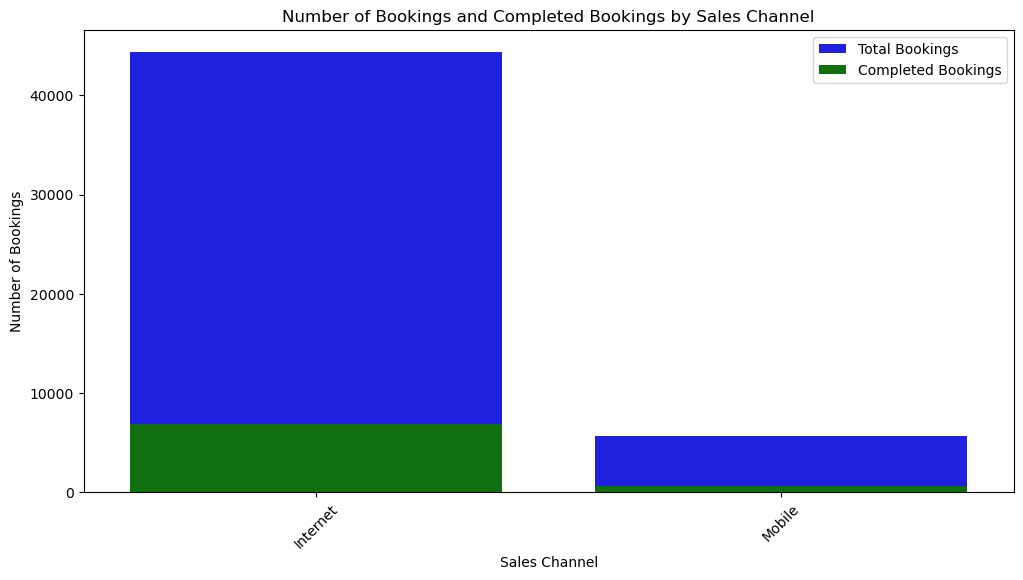

In [64]:

import seaborn as sns 
# 2. Visualize the results
plt.figure(figsize=(12, 6))

# Bar plot for number of bookings
sns.barplot(x='sales_channel', y='num_bookings', data=sales_channel_bookings, color='blue', label='Total Bookings')

# Bar plot for completed bookings, overlayed on the same plot
sns.barplot(x='sales_channel', y='completed_bookings', data=sales_channel_bookings, color='green', label='Completed Bookings')

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings and Completed Bookings by Sales Channel')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [66]:
# num of bookings and completed bookings rate 

# Calculate total number of bookings
total_bookings_count = len(data)

# Group by 'sales_channel' and calculate the required aggregations
sales_channel_bookings = data.groupby('sales_channel').agg(
    total_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate booking rate and completed booking rate
sales_channel_bookings['booking_rate'] = round((sales_channel_bookings['total_bookings'] / total_bookings_count) * 100, 2)
sales_channel_bookings['completed_booking_rate'] = round((sales_channel_bookings['completed_bookings'] / sales_channel_bookings['total_bookings']) * 100, 2)

# Sort the results by total number of bookings in descending order
sales_channel_bookings = sales_channel_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
sales_channel_bookings = pd.DataFrame(sales_channel_bookings)
sales_channel_bookings.head() 


# # Visualize the results
# plt.figure(figsize=(14, 7))

# # Bar plot for total bookings
# sns.barplot(x='sales_channel', y='total_bookings', data=sales_channel_bookings, color='blue', label='Total Bookings')

# # Bar plot for completed bookings, overlayed on the same plot
# sns.barplot(x='sales_channel', y='completed_bookings', data=sales_channel_bookings, color='green', label='Completed Bookings')

# # Add a second y-axis for rates
# ax2 = plt.twinx()

# # Plot booking rate
# sns.lineplot(x='sales_channel', y='booking_rate', data=sales_channel_bookings, marker='o', color='red', label='Booking Rate', ax=ax2)
# ax2.set_ylabel('Rate (%)')

# # Plot completed booking rate
# sns.lineplot(x='sales_channel', y='completed_booking_rate', data=sales_channel_bookings, marker='o', color='orange', label='Completed Booking Rate', ax=ax2)

# # Add labels and title
# plt.title('Booking and Completed Booking Rates by Sales Channel')
# plt.xlabel('Sales Channel')
# ax2.set_ylabel('Rate (%)')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=45)
# plt.legend(loc='upper left')

# # Show the plot
# plt.show()


,sales_channel,total_bookings,completed_bookings,booking_rate,completed_booking_rate
0,Internet,44382,6869,88.76,15.48
1,Mobile,5618,609,11.24,10.84


In [68]:
# TODO: MAKE IT A DATAFRAME 
# TODO: VISUALISE IT ?? 

# CUSTOMER PREFERENCE ANALYSIS ? 

# Calculate total number of bookings
total_bookings = len(data)

# Calculate the required aggregations
extra_baggage = data['wants_extra_baggage'].sum()
extra_baggage_rate = round((extra_baggage / total_bookings) * 100, 2)

preferred_seat = data['wants_preferred_seat'].sum()
preferred_seat_rate = round((preferred_seat / total_bookings) * 100, 2)

in_flight_meals = data['wants_in_flight_meals'].sum()
in_flight_meals_rate = round((in_flight_meals / total_bookings) * 100, 2)

avg_flight_duration = data['flight_duration'].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'total_bookings': [total_bookings],
    'extra_baggage': [extra_baggage],
    'extra_baggage_rate': [extra_baggage_rate],
    'preferred_seat': [preferred_seat],
    'preferred_seat_rate': [preferred_seat_rate],
    'in_flight_meals': [in_flight_meals],
    'in_flight_meals_rate': [in_flight_meals_rate],
    'avg_flight_duration': [avg_flight_duration]
})

# Display the results
summary_df = pd.DataFrame(summary_df)
summary_df.head() 

,total_bookings,extra_baggage,extra_baggage_rate,preferred_seat,preferred_seat_rate,in_flight_meals,in_flight_meals_rate,avg_flight_duration
0,50000,33439,66.88,14848,29.7,21357,42.71,7.277561


    trip_type  num_bookings
2   RoundTrip         49497
1      OneWay           387
0  CircleTrip           116


/var/folders/5t/7hx4nw5j3t1dw774_hfpxkhm0000gn/T/ipykernel_787/393431182.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trip_type', y='num_bookings', data=trip_type_bookings, palette='viridis')


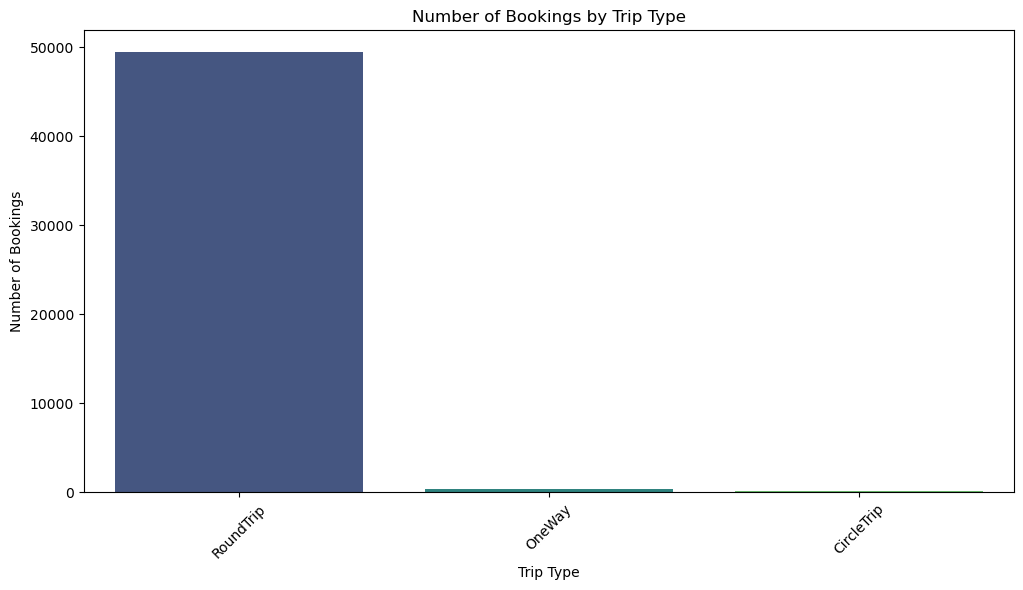

In [40]:
# TRIP TYPE ANALYSIS 


# Group by 'trip_type' and calculate the number of bookings
trip_type_bookings = data.groupby('trip_type').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
trip_type_bookings = trip_type_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
print(trip_type_bookings)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='trip_type', y='num_bookings', data=trip_type_bookings, palette='viridis')
plt.title('Number of Bookings by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

     purchase_lead  num_bookings  completed_bookings
0                0           370                  42
1                1           685                 102
2                2           670                 120
3                3           576                 114
4                4           606                 121
..             ...           ...                 ...
465            625             1                   0
466            633             1                   0
467            641             1                   1
468            704             1                   0
469            867             1                   1

[470 rows x 3 columns]


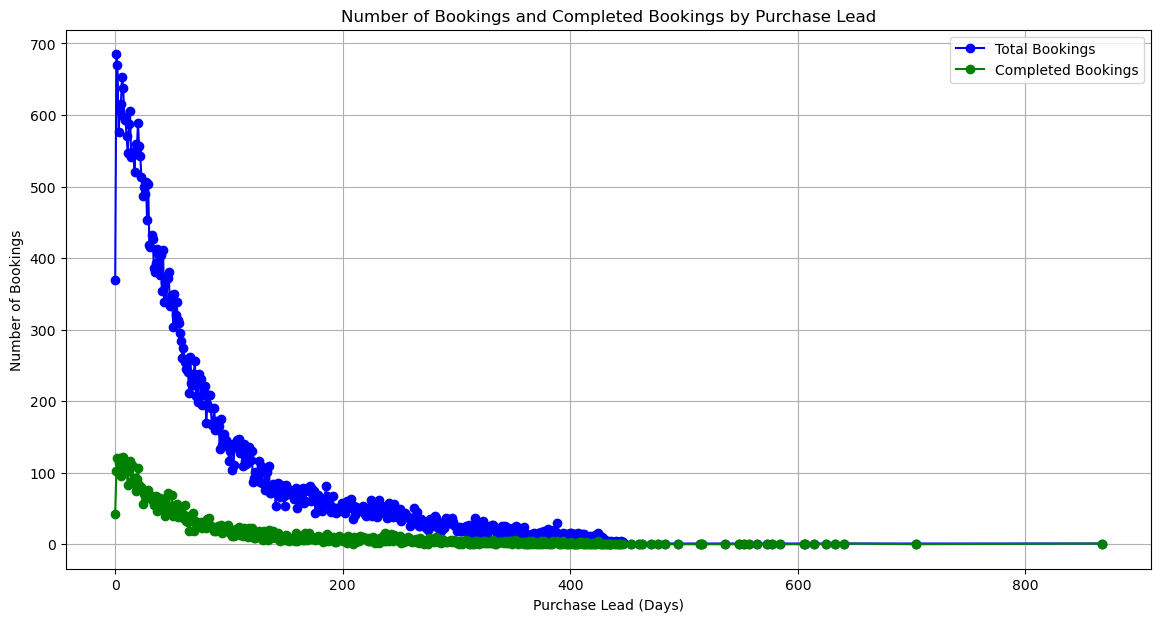

In [41]:
# LEAD TIME ANALYSIS 

# Group by 'purchase_lead' and calculate the number of bookings and completed bookings
purchase_lead_bookings = data.groupby('purchase_lead').agg(
    num_bookings=('purchase_lead', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Sort the results by 'purchase_lead'
purchase_lead_bookings = purchase_lead_bookings.sort_values(by='purchase_lead')

# Display the results
print(purchase_lead_bookings)

# Visualize the results
plt.figure(figsize=(14, 7))

# Plot for number of bookings
plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['num_bookings'], marker='o', linestyle='-', color='blue', label='Total Bookings')

# Plot for completed bookings
plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['completed_bookings'], marker='o', linestyle='-', color='green', label='Completed Bookings')

# Add labels and title
plt.title('Number of Bookings and Completed Bookings by Purchase Lead')
plt.xlabel('Purchase Lead (Days)')
plt.ylabel('Number of Bookings')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [43]:
# LENGTH OF STAY ANALYSIS 
# TODO: CHECK ON THE VISUALS AND FIX IT 
# Group by 'length_of_stay' and calculate the number of bookings
length_of_stay_bookings = data.groupby('length_of_stay').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
length_of_stay_bookings = length_of_stay_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
length_of_stay_bookings = pd.DataFrame(length_of_stay_bookings)
length_of_stay_bookings.head(10)

# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='length_of_stay', y='num_bookings', data=length_of_stay_bookings, palette='viridis')

# # Add labels and title
# plt.title('Number of Bookings by Length of Stay')
# plt.xlabel('Length of Stay (Days)')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


,length_of_stay,num_bookings
6,6,7757
5,5,7286
4,4,5655
3,3,2839
7,17,1849
11,21,1392
8,18,1356
12,22,1285
10,20,1285
9,19,1253


In [47]:
# FLIGHT TIME ANALYSIS 


# Group by 'flight_hour' and calculate the number of bookings
flight_hour_bookings = data.groupby('flight_hour').size().reset_index(name='num_bookings')

# Sort the results by 'flight_hour'
flight_hour_bookings = flight_hour_bookings.sort_values(by='flight_hour')

# Display the results
flight_hour_bookings = pd.DataFrame(flight_hour_bookings)
flight_hour_bookings.head(10) 

# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='flight_hour', y='num_bookings', data=flight_hour_bookings, palette='viridis')

# # Add labels and title
# plt.title('Number of Bookings by Flight Hour')
# plt.xlabel('Flight Hour')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


,flight_hour,num_bookings
0,0,1539
1,1,2089
2,2,2642
3,3,2655
4,4,2843
5,5,2851
6,6,3050
7,7,3126
8,8,3165
9,9,3132


In [50]:
# ROUTE ANALYSIS 

# Group by 'route' and calculate the number of bookings
route_bookings = data.groupby('route').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
route_bookings = route_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
# print(route_bookings)
route_bookings = pd.DataFrame(route_bookings)
route_bookings.head(100) 

# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='route', y='num_bookings', data=route_bookings.head(20), palette='viridis') # Display top 20 routes for readability

# # Add labels and title
# plt.title('Number of Bookings by Route')
# plt.xlabel('Route')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()



,route,num_bookings
6,AKLKUL,2680
717,PENTPE,924
633,MELSGN,842
436,ICNSIN,801
287,DMKKIX,744
...,...,...
150,CMBOOL,126
674,MYYPER,125
659,MNLPER,125
272,DELPER,123


In [72]:
# BOOKING ORIGIN ANALYSIS 


# Group by 'booking_origin' and calculate the number of bookings
booking_origin_bookings = data.groupby('booking_origin').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
booking_origin_bookings = booking_origin_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
booking_origin_bookings = pd.DataFrame(booking_origin_bookings)
booking_origin_bookings.head(100) 

# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='booking_origin', y='num_bookings', data=booking_origin_bookings.head(20), palette='viridis') # Display top 20 origins for readability

# # Add labels and title
# plt.title('Number of Bookings by Booking Origin')
# plt.xlabel('Booking Origin')
# plt.ylabel('Number of Bookings')
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()


,booking_origin,num_bookings
4,Australia,17872
51,Malaysia,7174
85,South Korea,4559
43,Japan,3885
17,China,3387
...,...,...
53,Malta,1
10,Bhutan,1
81,Slovakia,1
8,Belarus,1


In [73]:
# FLIGHT DURATION ANALYSIS 


# Group by 'route' and calculate the average flight duration
route_duration = data.groupby('route')['flight_duration'].mean().reset_index(name='avg_duration')

# Sort the results by average duration in descending order
route_duration = route_duration.sort_values(by='avg_duration', ascending=False)

# Display the results
route_duration = pd.DataFrame(route_duration)
route_duration.head(100) 
# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='route', y='avg_duration', data=route_duration.head(20), palette='viridis')  # Display top 20 routes for readability

# # Add labels and title
# plt.title('Average Flight Duration by Route')
# plt.xlabel('Route')
# plt.ylabel('Average Duration (Hours)')
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()


,route,avg_duration
370,HKTJED,9.50
465,JEDMNL,9.50
415,ICNJED,9.50
104,CGKJED,9.50
461,JEDJOG,9.50
...,...,...
651,MLEOOL,8.83
648,MFMOOL,8.83
647,MELXIY,8.83
646,MELWUH,8.83


In [78]:
# BOOKING COMPLETION ANALYSIS 
# TODO: IS THIS ONE IMPORTANT ?? 

# Grouping by 'booking_origin' and calculating the completion rate
result = data.groupby('booking_origin').agg(
    completion_rate=('booking_complete', lambda x: x.sum() / len(x)),
    completed_booking_rate=('booking_complete', lambda x: round((x.sum() / len(x)) * 100, 1))
).reset_index()

# Sorting the DataFrame by the completion rate
result = result.sort_values(by='completion_rate')

# Display the results
result = pd.DataFrame(result) 
result.head(100)

# # Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='booking_origin', y='completion_rate', data=completion_rate.head(20), palette='viridis')  # Display top 20 origins for readability

# # Add labels and title
# plt.title('Booking Completion Rate by Origin')
# plt.xlabel('Booking Origin')
# plt.ylabel('Completion Rate')
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()


,booking_origin,completion_rate,completed_booking_rate
32,Guam,0.000000,0.0
30,Gibraltar,0.000000,0.0
63,Norfolk Island,0.000000,0.0
33,Guatemala,0.000000,0.0
92,Tanzania,0.000000,0.0
...,...,...,...
89,Sweden,0.416667,41.7
23,Denmark,0.428571,42.9
75,Romania,0.500000,50.0
6,Bahrain,0.600000,60.0


In [81]:
# LEAD TIME AND BOOKING COMPLETION ANALYSIS 
# TODO: IS THE DIAGRAM NECESSARY ?? 

# Group by 'purchase_lead' and calculate the required aggregations
purchase_lead_bookings = data.groupby('purchase_lead').agg(
    total_bookings=('purchase_lead', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
purchase_lead_bookings['completion_rate'] = round((purchase_lead_bookings['completed_bookings'] / purchase_lead_bookings['total_bookings']) * 100, 2)

# Filter out low frequency lead times
purchase_lead_bookings = purchase_lead_bookings[purchase_lead_bookings['total_bookings'] > 100]

# Sort the results by 'purchase_lead'
purchase_lead_bookings = purchase_lead_bookings.sort_values(by='purchase_lead')

# Display the results
purchase_lead_bookings = pd.DataFrame(purchase_lead_bookings)
purchase_lead_bookings.head(10)


# # Visualize the results
# plt.figure(figsize=(14, 7))

# # Plot for total bookings
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['total_bookings'], marker='o', linestyle='-', color='blue', label='Total Bookings')

# # Plot for completed bookings
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['completed_bookings'], marker='o', linestyle='-', color='green', label='Completed Bookings')

# # Plot for completion rate
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['completion_rate'], marker='o', linestyle='-', color='red', label='Completion Rate (%)')

# # Add labels and title
# plt.title('Total Bookings, Completed Bookings, and Completion Rate by Purchase Lead')
# plt.xlabel('Purchase Lead (Days)')
# plt.ylabel('Count / Rate')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()


,purchase_lead,total_bookings,completed_bookings,completion_rate
0,0,370,42,11.35
1,1,685,102,14.89
2,2,670,120,17.91
3,3,576,114,19.79
4,4,606,121,19.97
5,5,615,96,15.61
6,6,653,118,18.07
7,7,638,122,19.12
8,8,597,108,18.09
9,9,593,104,17.54


In [82]:
# WHAT IS THIS ONE ?
# TODO: USE PANDAS DATAFRAME 
# TODO: IS THE DIAGRAM NECESSARY ?? 
# Group by 'trip_type' and calculate the required aggregations
trip_type_bookings = data.groupby('trip_type').agg(
    total_bookings=('trip_type', 'size'),
    total_extra_baggage=('wants_extra_baggage', 'sum'),
    total_preferred_seat=('wants_preferred_seat', 'sum'),
    total_in_flight_meals=('wants_in_flight_meals', 'sum')
).reset_index()

# Calculate rates
trip_type_bookings['extra_baggage_rate'] = round((trip_type_bookings['total_extra_baggage'] / trip_type_bookings['total_bookings']) * 100, 2)
trip_type_bookings['preferred_seat_rate'] = round((trip_type_bookings['total_preferred_seat'] / trip_type_bookings['total_bookings']) * 100, 2)
trip_type_bookings['in_flight_meals_rate'] = round((trip_type_bookings['total_in_flight_meals'] / trip_type_bookings['total_bookings']) * 100, 2)

# Sort the results by total number of bookings in descending order
trip_type_bookings = trip_type_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
trip_type_bookings = pd.DataFrame(trip_type_bookings)
trip_type_bookings.head(10) 

# Visualize the results
# plt.figure(figsize=(14, 7))
# sns.barplot(x='trip_type', y='total_bookings', data=trip_type_bookings, palette='viridis')

# # Add labels and title
# plt.title('Total Bookings by Trip Type')
# plt.xlabel('Trip Type')
# plt.ylabel('Total Bookings')
# plt.xticks(rotation=45)
# plt.show()

# # Additional visualization for rates
# plt.figure(figsize=(14, 7))

# # Plotting rates for trip types
# plt.plot(trip_type_bookings['trip_type'], trip_type_bookings['extra_baggage_rate'], marker='o', linestyle='-', color='blue', label='Extra Baggage Rate')
# plt.plot(trip_type_bookings['trip_type'], trip_type_bookings['preferred_seat_rate'], marker='o', linestyle='-', color='green', label='Preferred Seat Rate')
# plt.plot(trip_type_bookings['trip_type'], trip_type_bookings['in_flight_meals_rate'], marker='o', linestyle='-', color='red', label='In-Flight Meals Rate')

# # Add labels and title
# plt.title('Rates by Trip Type')
# plt.xlabel('Trip Type')
# plt.ylabel('Rate (%)')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


,trip_type,total_bookings,total_extra_baggage,total_preferred_seat,total_in_flight_meals,extra_baggage_rate,preferred_seat_rate,in_flight_meals_rate
2,RoundTrip,49497,33073,14715,21177,66.82,29.73,42.78
1,OneWay,387,275,99,134,71.06,25.58,34.63
0,CircleTrip,116,91,34,46,78.45,29.31,39.66


In [83]:
# BOOKING COMPLETION ANALYSIS BY MULTIPLE FACTORS 
# TODO: USE PANDAS DATAFRAME 

# Group by 'trip_type', 'sales_channel', and 'flight_day' and calculate the required aggregations
grouped_bookings = data.groupby(['trip_type', 'sales_channel', 'flight_day']).agg(
    total_bookings=('trip_type', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
grouped_bookings['completion_rate'] = round((grouped_bookings['completed_bookings'] / grouped_bookings['total_bookings']) * 100, 2)

# Sort the results by total number of bookings in descending order
grouped_bookings = grouped_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
grouped_bookings = pd.DataFrame(grouped_bookings) 
grouped_bookings.head(100)

# Visualize the results (you can choose to visualize any specific aspect of the grouped data)
# plt.figure(figsize=(14, 7))

# # Plot total bookings by flight_day for the top trip_type and sales_channel combinations
# top_combinations = grouped_bookings.groupby(['trip_type', 'sales_channel']).head(10)  # Display top 10 combinations for readability

# sns.barplot(x='flight_day', y='total_bookings', hue='trip_type', data=top_combinations, palette='viridis')

# # Add labels and title
# plt.title('Total Bookings by Flight Day, Trip Type, and Sales Channel')
# plt.xlabel('Flight Day')
# plt.ylabel('Total Bookings')
# plt.legend(title='Trip Type')
# plt.xticks(rotation=45)
# plt.show()



,trip_type,sales_channel,flight_day,total_bookings,completed_bookings,completion_rate
24,RoundTrip,Internet,Mon,7198,1102,15.31
29,RoundTrip,Internet,Wed,6845,1154,16.86
28,RoundTrip,Internet,Tue,6810,1050,15.42
27,RoundTrip,Internet,Thu,6613,1029,15.56
23,RoundTrip,Internet,Fri,5883,888,15.09
26,RoundTrip,Internet,Sun,5601,838,14.96
25,RoundTrip,Internet,Sat,4951,785,15.86
33,RoundTrip,Mobile,Sun,887,89,10.03
31,RoundTrip,Mobile,Mon,831,99,11.91
30,RoundTrip,Mobile,Fri,811,90,11.10


In [86]:
# WHAT IS THIS ?? 


# Group by 'sales_channel' and calculate the required aggregations
grouped_bookings = data.groupby('sales_channel').agg(
    total_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum'),
    completion_rate=('booking_complete', 'mean'),
    avg_purchase_lead=('purchase_lead', 'mean'),
    avg_length_of_stay=('length_of_stay', 'mean')
).reset_index()

# Calculate the final completion rate percentage
grouped_bookings['completion_rate'] = round(grouped_bookings['completion_rate'] * 100, 2)

# Sort the results by total number of bookings in descending order
grouped_bookings = grouped_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
grouped_bookings = pd.DataFrame(grouped_bookings) 
grouped_bookings.head(100)

# Visualize the results
# plt.figure(figsize=(14, 7))

# # Bar plot for total bookings by sales_channel
# sns.barplot(x='sales_channel', y='total_bookings', data=grouped_bookings, palette='viridis')
# plt.title('Total Bookings by Sales Channel')
# plt.xlabel('Sales Channel')
# plt.ylabel('Total Bookings')
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(14, 7))

# # Bar plot for completion rate by sales_channel
# sns.barplot(x='sales_channel', y='completion_rate', data=grouped_bookings, palette='viridis')
# plt.title('Completion Rate by Sales Channel')
# plt.xlabel('Sales Channel')
# plt.ylabel('Completion Rate (%)')
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(14, 7))

# # Bar plot for average purchase lead by sales_channel
# sns.barplot(x='sales_channel', y='avg_purchase_lead', data=grouped_bookings, palette='viridis')
# plt.title('Average Purchase Lead by Sales Channel')
# plt.xlabel('Sales Channel')
# plt.ylabel('Average Purchase Lead (Days)')
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(14, 7))

# # Bar plot for average length of stay by sales_channel
# sns.barplot(x='sales_channel', y='avg_length_of_stay', data=grouped_bookings, palette='viridis')
# plt.title('Average Length of Stay by Sales Channel')
# plt.xlabel('Sales Channel')
# plt.ylabel('Average Length of Stay (Days)')
# plt.xticks(rotation=45)
# plt.show()


,sales_channel,total_bookings,completed_bookings,completion_rate,avg_purchase_lead,avg_length_of_stay
0,Internet,44382,6869,15.48,85.371682,23.772205
1,Mobile,5618,609,10.84,81.533998,17.296191


In [87]:
# PART 3 DIAGNOSTIC ANALYTICS 
# 1. REASONS FOR BOOKING COMPLETENESS 
# TODO: DATAFRAME ? 
# TODO: IS THE VISUAL NECESSARY ?? 

# Group by 'sales_channel', 'trip_type', 'booking_origin', and 'flight_day' and calculate the required aggregations
grouped_bookings = data.groupby(['sales_channel', 'trip_type', 'booking_origin', 'flight_day']).agg(
    total_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
grouped_bookings['completion_rate'] = round((grouped_bookings['completed_bookings'] / grouped_bookings['total_bookings']) * 100, 2)

# Sort the results by completion rate in descending order
grouped_bookings = grouped_bookings.sort_values(by='completion_rate', ascending=False)

# Display the results
grouped_bookings = pd.DataFrame(grouped_bookings) 
grouped_bookings.head(100) 

# # Visualize the results (showing top 20 combinations for readability)
# plt.figure(figsize=(14, 7))
# top_combinations = grouped_bookings.head(20)
# sns.barplot(x='completion_rate', y='total_bookings', hue='sales_channel', data=top_combinations, palette='viridis')

# # Add labels and title
# plt.title('Top 20 Booking Combinations by Completion Rate')
# plt.xlabel('Completion Rate (%)')
# plt.ylabel('Total Bookings')
# plt.legend(title='Sales Channel')
# plt.xticks(rotation=45)
# plt.show()


,sales_channel,trip_type,booking_origin,flight_day,total_bookings,completed_bookings,completion_rate
407,Internet,RoundTrip,Pakistan,Mon,1,1,100.00
662,Mobile,RoundTrip,Macau,Sun,1,1,100.00
59,Internet,OneWay,France,Wed,1,1,100.00
250,Internet,RoundTrip,Greece,Mon,1,1,100.00
660,Mobile,RoundTrip,Macau,Mon,1,1,100.00
...,...,...,...,...,...,...,...
321,Internet,RoundTrip,Laos,Thu,3,1,33.33
756,Mobile,RoundTrip,United States,Sun,6,2,33.33
366,Internet,RoundTrip,Myanmar (Burma),Sat,6,2,33.33
754,Mobile,RoundTrip,United States,Mon,6,2,33.33


In [89]:
# PURCHASE LEAD IMPACT AND BOOKING COMPLETENESS 

# Group by 'purchase_lead' and calculate the required aggregations
purchase_lead_bookings = data.groupby('purchase_lead').agg(
    total_bookings=('purchase_lead', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
purchase_lead_bookings['completion_rate'] = round((purchase_lead_bookings['completed_bookings'] / purchase_lead_bookings['total_bookings']) * 100, 2)

# Sort the results by 'purchase_lead'
purchase_lead_bookings = purchase_lead_bookings.sort_values(by='purchase_lead')

# Display the results
purchase_lead_bookings = pd.DataFrame(purchase_lead_bookings) 
purchase_lead_bookings.head(100) 

# # Visualize the results
# plt.figure(figsize=(14, 7))

# # Plot total bookings
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['total_bookings'], marker='o', linestyle='-', color='blue', label='Total Bookings')

# # Plot completed bookings
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['completed_bookings'], marker='o', linestyle='-', color='green', label='Completed Bookings')

# # Plot completion rate
# plt.plot(purchase_lead_bookings['purchase_lead'], purchase_lead_bookings['completion_rate'], marker='o', linestyle='-', color='red', label='Completion Rate (%)')

# # Add labels and title
# plt.title('Total Bookings, Completed Bookings, and Completion Rate by Purchase Lead')
# plt.xlabel('Purchase Lead (Days)')
# plt.ylabel('Count / Rate')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()


,purchase_lead,total_bookings,completed_bookings,completion_rate
0,0,370,42,11.35
1,1,685,102,14.89
2,2,670,120,17.91
3,3,576,114,19.79
4,4,606,121,19.97
...,...,...,...,...
95,95,144,24,16.67
96,96,154,20,12.99
97,97,145,23,15.86
98,98,138,23,16.67


In [90]:
# CUSTOMER PREFERENCES AND BOOKING COMPLETENESS 
# TODO: DATAFRAME IT 
# TODO: CHECK THE VISUALISATION ?? 


# Group by 'wants_extra_baggage', 'wants_preferred_seat', and 'wants_in_flight_meals' and calculate the required aggregations
grouped_bookings = data.groupby(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']).agg(
    total_bookings=('wants_extra_baggage', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
grouped_bookings['completion_rate'] = round((grouped_bookings['completed_bookings'] / grouped_bookings['total_bookings']) * 100, 2)

# Sort the results by completion rate in descending order
grouped_bookings = grouped_bookings.sort_values(by='completion_rate', ascending=False)

# Display the results
grouped_bookings = pd.DataFrame(grouped_bookings) 
grouped_bookings.head(100) 

# # Visualize the results (showing top 20 combinations for readability)
# plt.figure(figsize=(14, 7))
# top_combinations = grouped_bookings.head(20)
# sns.barplot(x='completion_rate', y='total_bookings', hue='wants_extra_baggage', data=top_combinations, palette='viridis')

# # Add labels and title
# plt.title('Top 20 Combinations by Completion Rate')
# plt.xlabel('Completion Rate (%)')
# plt.ylabel('Total Bookings')
# plt.legend(title='Wants Extra Baggage')
# plt.xticks(rotation=45)
# plt.show()


,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,total_bookings,completed_bookings,completion_rate
7,1,1,1,8770,1631,18.60
6,1,1,0,3393,622,18.33
4,1,0,0,13243,2110,15.93
3,0,1,1,1133,174,15.36
5,1,0,1,8033,1210,15.06
2,0,1,0,1552,202,13.02
1,0,0,1,3421,413,12.07
0,0,0,0,10455,1116,10.67


In [91]:
# FLIGHT DURATION AND BOOKING COMPLETENESS 


# Group by 'flight_duration' and calculate the required aggregations
flight_duration_bookings = data.groupby('flight_duration').agg(
    total_bookings=('flight_duration', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
flight_duration_bookings['completion_rate'] = round((flight_duration_bookings['completed_bookings'] / flight_duration_bookings['total_bookings']) * 100, 2)

# Sort the results by 'flight_duration'
flight_duration_bookings = flight_duration_bookings.sort_values(by='flight_duration')

# Display the results
flight_duration_bookings = pd.DataFrame(flight_duration_bookings)
flight_duration_bookings.head(100) 

# # Visualize the results
# plt.figure(figsize=(14, 7))

# # Plot total bookings
# plt.plot(flight_duration_bookings['flight_duration'], flight_duration_bookings['total_bookings'], marker='o', linestyle='-', color='blue', label='Total Bookings')

# # Plot completed bookings
# plt.plot(flight_duration_bookings['flight_duration'], flight_duration_bookings['completed_bookings'], marker='o', linestyle='-', color='green', label='Completed Bookings')

# # Plot completion rate
# plt.plot(flight_duration_bookings['flight_duration'], flight_duration_bookings['completion_rate'], marker='o', linestyle='-', color='red', label='Completion Rate (%)')

# # Add labels and title
# plt.title('Total Bookings, Completed Bookings, and Completion Rate by Flight Duration')
# plt.xlabel('Flight Duration (Hours)')
# plt.ylabel('Count / Rate')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()


,flight_duration,total_bookings,completed_bookings,completion_rate
0,4.67,2743,675,24.61
1,4.72,502,121,24.10
2,4.75,1255,419,33.39
3,4.83,156,19,12.18
4,5.00,241,58,24.07
5,5.07,512,121,23.63
6,5.13,125,28,22.40
7,5.33,1554,386,24.84
8,5.52,667,52,7.80
9,5.62,5524,525,9.50


In [94]:
# HOW THE DAY OF THE WEEK AFFECTS BOOKING COMPLETION AND CUSTOMER PREFERENCES 


# Grouping by 'flight_day' and calculating the required metrics
result = data.groupby('flight_day').agg(
    total_bookings=('flight_day', 'size'),
    total_extra_baggage=('wants_extra_baggage', 'sum'),
    total_preferred_seat=('wants_preferred_seat', 'sum'),
    total_in_flight_meals=('wants_in_flight_meals', 'sum'),
    completed_rate=('booking_complete', lambda x: round(x.sum() / len(x) * 100, 2))
).reset_index()

# Sorting the DataFrame by the completed rate in descending order
result = result.sort_values(by='completed_rate', ascending=False)

# Print the result or export to CSV/Excel
result = pd.DataFrame(result) 
result.head(10) 

# Optionally, to save to a CSV:
# result.to_csv('flight_day_booking_analysis.csv', index=False)


,flight_day,total_bookings,total_extra_baggage,total_preferred_seat,total_in_flight_meals,completed_rate
6,Wed,7674,5161,2311,3258,16.31
4,Thu,7424,4988,2129,3205,15.11
1,Mon,8102,5372,2464,3423,14.86
2,Sat,5812,3915,1786,2515,14.81
5,Tue,7673,5171,2181,3203,14.71
0,Fri,6761,4515,1974,2931,14.54
3,Sun,6554,4317,2003,2822,14.14


In [96]:
# IMPACT OF TRIP TYPE ON CUSTOMER PREFERENCES AND BOOKING COMPLETION 


# Grouping by 'trip_type' and calculating the required metrics
result = data.groupby('trip_type').agg(
    total_bookings=('trip_type', 'size'),
    total_extra_baggage=('wants_extra_baggage', 'sum'),
    total_preferred_seat=('wants_preferred_seat', 'sum'),
    total_in_flight_meals=('wants_in_flight_meals', 'sum'),
    completed_rate=('booking_complete', lambda x: round((x.sum() / len(x)) * 100, 2))
).reset_index()

# Sorting the DataFrame by the completed rate in descending order
result = result.sort_values(by='completed_rate', ascending=False)

# Print the result or export to CSV/Excel
result = pd.DataFrame(result) 
result.head() 

# Optionally, to save to a CSV:
# result.to_csv('trip_type_booking_analysis.csv', index=False)


,trip_type,total_bookings,total_extra_baggage,total_preferred_seat,total_in_flight_meals,completed_rate
2,RoundTrip,49497,33073,14715,21177,15.06
1,OneWay,387,275,99,134,5.17
0,CircleTrip,116,91,34,46,4.31


In [98]:
# LENGTH OF STAY ANALYSIS 
# TODO: ANALYSE HOW THE LENGTH OF STAY AFFECTS BOOKING COMPLETION AND CUSTOMER PREFERENCES 

# Grouping by 'length_of_stay' and calculating required metrics
result = data.groupby('length_of_stay').agg(
    total_bookings=('length_of_stay', 'size'),
    total_extra_baggage=('wants_extra_baggage', 'sum'),
    total_preferred_seat=('wants_preferred_seat', 'sum'),
    total_in_flight_meals=('wants_in_flight_meals', 'sum'),
    completed_rate=('booking_complete', lambda x: round((x == 1).sum() / len(x) * 100, 2))
).reset_index()

# Sorting the DataFrame by the completed rate in descending order
result = result.sort_values(by='completed_rate', ascending=False)

# Print the result or export to CSV/Excel
result = pd.DataFrame(result) 
result.head() 

# Optionally, to save to a CSV:
# result.to_csv('length_of_stay_booking_analysis.csv', index=False)


,length_of_stay,total_bookings,total_extra_baggage,total_preferred_seat,total_in_flight_meals,completed_rate
334,778,1,0,0,0,100.0
272,311,2,1,1,0,100.0
323,465,1,1,0,0,100.0
321,435,1,0,0,0,100.0
319,415,1,1,0,1,100.0


In [99]:
# PART 3 -> PREDICTIVE ANALYTICS PART 
# USE SCIKIT LEARN FOR THE MACHINE LEARNING PART 

# CHECK THE DATASET AGAIN 
data.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
